In [0]:
#import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [0]:

#Load dataset IRIS
data=pd.read_csv("IRIS.csv")

In [170]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [171]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [173]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [174]:
# species is object type so convert into numeric category
pd.get_dummies(data['species'])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

In [176]:
data['species'].unique().sum()

3

In [177]:

data['species'].value_counts()     #each species has 50 records

2    50
1    50
0    50
Name: species, dtype: int64

In [0]:

# split data in train and test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3,random_state=1)

In [0]:

# stanrdized the features 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

In [0]:
# Apply decision tree for classification

In [181]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred_test=dt.predict(Xtest)
accuracy=accuracy_score(ytest,pred_test)*100



In [183]:

print(accuracy)


95.55555555555556


In [0]:
classification_rep=classification_report(ytest,pred_test)

In [185]:
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



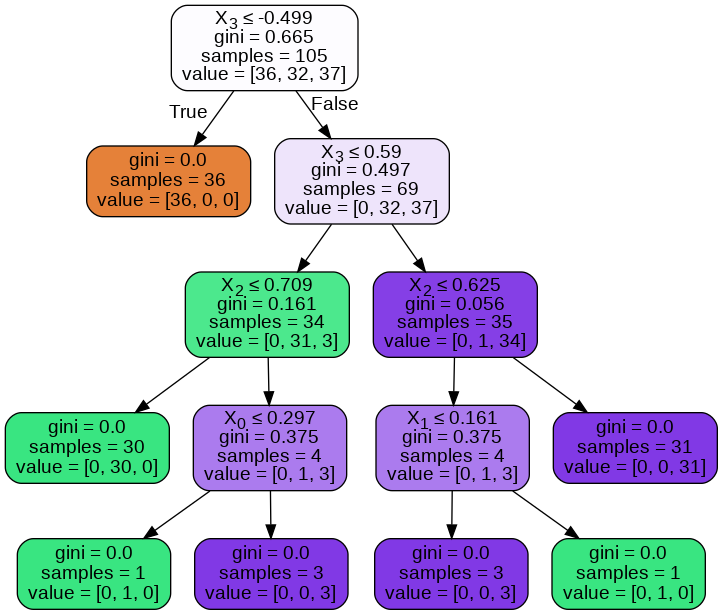

In [186]:
# Visualization of Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

